In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


3.1 Warming Up Exercises -       
Basic Inspection and Exploration
Problem 1 – Data Read, Write and Inspect

In [3]:
import pandas as pd

# Load dataset
bank = pd.read_csv("/content/drive/My Drive/Colab Notebooks/AI Worksheet/bank.csv")

# (a) Object Columns
obj_cols = bank.select_dtypes(include="object").columns
print("Object columns:\n", obj_cols)

# (b) Unique values of each object column
for col in obj_cols:
    print(f"\nUnique values in '{col}':")
    print(bank[col].unique())

# (c) Check null values
print("\nNull values per column:")
print(bank.isnull().sum())

# Drop object columns
bank_numeric = bank.drop(columns=obj_cols)

# Save cleaned file
bank_numeric.to_csv("/content/drive/My Drive/Colab Notebooks/AI Worksheet/banknumericdata.csv", index=False)

# Load saved CSV
bank_numeric2 = pd.read_csv("/content/drive/My Drive/Colab Notebooks/AI Worksheet/banknumericdata.csv")

# Summary statistics
print("\nSummary Statistics:")
print(bank_numeric2.describe())


Object columns:
 Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

Unique values in 'job':
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']

Unique values in 'marital':
['married' 'single' 'divorced']

Unique values in 'education':
['tertiary' 'secondary' 'unknown' 'primary']

Unique values in 'default':
['no' 'yes']

Unique values in 'housing':
['yes' 'no']

Unique values in 'loan':
['no' 'yes']

Unique values in 'contact':
['unknown' 'cellular' 'telephone']

Unique values in 'month':
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']

Unique values in 'poutcome':
['unknown' 'failure' 'other' 'success']

Unique values in 'y':
['no' 'yes']

Null values per column:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan        

SECTION 2 — MEDICAL STUDENTS DATASET SOLUTIONS
Problem 2 — Missing Values, Duplicate Removal

In [4]:
# Load dataset
med = pd.read_csv("/content/drive/My Drive/Colab Notebooks/AI Worksheet/medical_students_dataset.csv")

# Missing values
print("\nMissing values in each column:")
print(med.isnull().sum())

# Handling missing values
for col in med.columns:
    if med[col].isnull().sum() > 0:
        if med[col].dtype != "object":
            med[col] = med[col].fillna(med[col].mean())
            print(f"Filled numerical '{col}' with mean")
        else:
            med[col] = med[col].fillna(med[col].mode()[0])
            print(f"Filled categorical '{col}' with mode")

# Remove duplicates
duplicates = med.duplicated().sum()
print("\nDuplicate rows:", duplicates)

med = med.drop_duplicates()



Missing values in each column:
Student ID        20000
Age               20000
Gender            20000
Height            20000
Weight            20000
Blood Type        20000
BMI               20000
Temperature       20000
Heart Rate        20000
Blood Pressure    20000
Cholesterol       20000
Diabetes          20000
Smoking           20000
dtype: int64
Filled numerical 'Student ID' with mean
Filled numerical 'Age' with mean
Filled categorical 'Gender' with mode
Filled numerical 'Height' with mean
Filled numerical 'Weight' with mean
Filled categorical 'Blood Type' with mode
Filled numerical 'BMI' with mean
Filled numerical 'Temperature' with mean
Filled numerical 'Heart Rate' with mean
Filled numerical 'Blood Pressure' with mean
Filled numerical 'Cholesterol' with mean
Filled categorical 'Diabetes' with mode
Filled categorical 'Smoking' with mode

Duplicate rows: 12572


SECTION 3 — TITANIC DATASET SOLUTIONS

Load Titanic dataset once:

In [5]:
titanic = pd.read_csv("/content/drive/My Drive/Colab Notebooks/AI Worksheet/Titanic-Dataset.csv")


Problem 3.1 — Subset + First-Class Stats

In [6]:
cols = ['Name', 'Pclass', 'Sex', 'Age', 'Fare', 'Survived']
df = titanic[cols]

# First class only
df1 = df[df["Pclass"] == 1]

print("Mean Fare:", df1['Fare'].mean())
print("Median Fare:", df1['Fare'].median())
print("Max Fare:", df1['Fare'].max())
print("Min Fare:", df1['Fare'].min())


Mean Fare: 84.1546875
Median Fare: 60.287499999999994
Max Fare: 512.3292
Min Fare: 0.0


Problem 3.2 — Remove Null Age Rows

In [7]:
print("Null Age Count:", df1['Age'].isnull().sum())

df1_clean = df1.dropna(subset=['Age'])

print("Rows after dropping null Age:", df1_clean.shape)


Null Age Count: 30
Rows after dropping null Age: (186, 6)


Problem 3.3 — One-Hot Encoding “Embarked”


In [8]:
# One-hot encoding
embarked_dummies = pd.get_dummies(titanic['Embarked'], prefix='Embarked')

# Add to dataframe
titanic = pd.concat([titanic, embarked_dummies], axis=1)

# Drop original
titanic = titanic.drop(columns=['Embarked'])

titanic.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,False,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,False,False,True


Problem 3.4 — Survival Rate by Gender (with bar chart)


Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


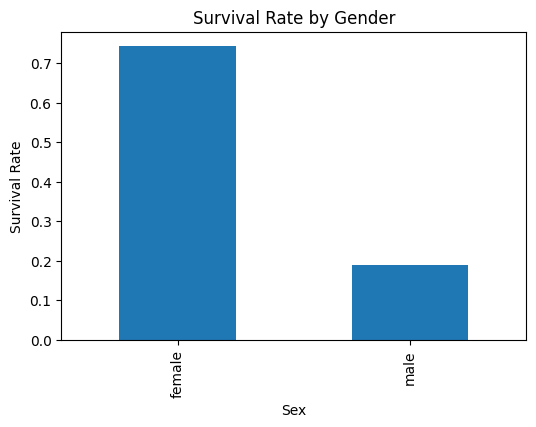

In [9]:
import matplotlib.pyplot as plt

gender_survival = titanic.groupby("Sex")["Survived"].mean()
print(gender_survival)

gender_survival.plot(kind='bar', figsize=(6,4))
plt.title("Survival Rate by Gender")
plt.ylabel("Survival Rate")
plt.show()


Problem 3.5 — Survival Rate by Embarked Port (C, Q, S)

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64


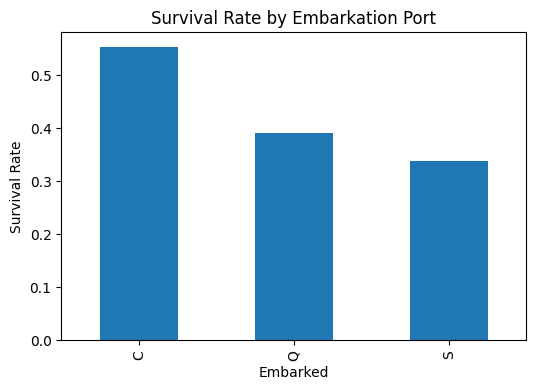

In [10]:
titanic2 = pd.read_csv("/content/drive/My Drive/Colab Notebooks/AI Worksheet/Titanic-Dataset.csv")

embarked_survival = titanic2.groupby("Embarked")["Survived"].mean()
print(embarked_survival)

embarked_survival.plot(kind='bar', figsize=(6,4))
plt.title("Survival Rate by Embarkation Port")
plt.ylabel("Survival Rate")
plt.show()


Problem 3.6 (Optional) — Survival by Age Group + Class

/tmp/ipython-input-3411556018.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pivot_table = titanic.groupby(['Pclass', 'AgeGroup'])['Survived'].mean()


Pclass  AgeGroup     
1       (0.419, 19.0]    0.809524
        (19.0, 25.0]     0.761905
        (25.0, 31.8]     0.666667
        (31.8, 41.0]     0.777778
        (41.0, 80.0]     0.506667
2       (0.419, 19.0]    0.742857
        (19.0, 25.0]     0.400000
        (25.0, 31.8]     0.416667
        (31.8, 41.0]     0.461538
        (41.0, 80.0]     0.363636
3       (0.419, 19.0]    0.333333
        (19.0, 25.0]     0.197674
        (25.0, 31.8]     0.283582
        (31.8, 41.0]     0.166667
        (41.0, 80.0]     0.088235
Name: Survived, dtype: float64


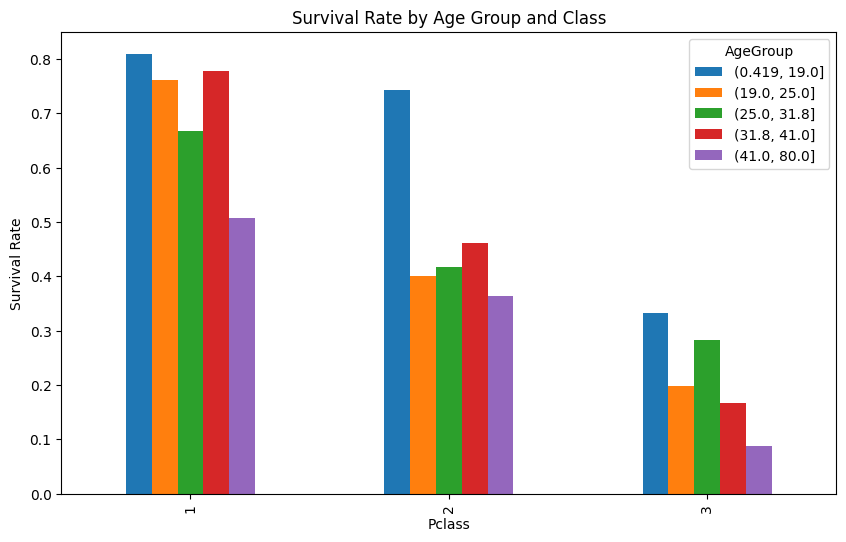

In [11]:
# Create age quantiles
titanic['AgeGroup'] = pd.qcut(titanic['Age'], 5)

pivot_table = titanic.groupby(['Pclass', 'AgeGroup'])['Survived'].mean()
print(pivot_table)

pivot_table.unstack().plot(kind='bar', figsize=(10,6))
plt.title("Survival Rate by Age Group and Class")
plt.ylabel("Survival Rate")
plt.show()
